## Notebook: python advanced

**Custom library exercise:** Create an own library and write a function that can compute the Euclidean distance between two points. The point coordinates are given as tuples. Hint: You will need a for-loop in this function that iterates pair-wise over the two coordinates:

In [31]:
p = (1.5, 6.4, 7.3)
q = (3.4, 1.0, 0.9)


In [117]:
import euclidean

euclidean.euc_dist(p, q)

4.250882261366456

### Custom functional parameters

You can also define your custom functions taking functional parameters. For example, we can define a count_blobs function that takes an image and a threshold_algorithm-function as parameter.

In [112]:
import matplotlib.pyplot as plt
from skimage.measure import label

def count_blobs(image, threshold_algorithm):
    # binarize the image using a given 
    # threshold-algorithm
    threshold = threshold_algorithm(image)
    binary = image > threshold
    
    # show intermediate result
    #plt.imshow(binary)
    
    # return count blobs
    labels = label(binary)
    return labels.max()
    

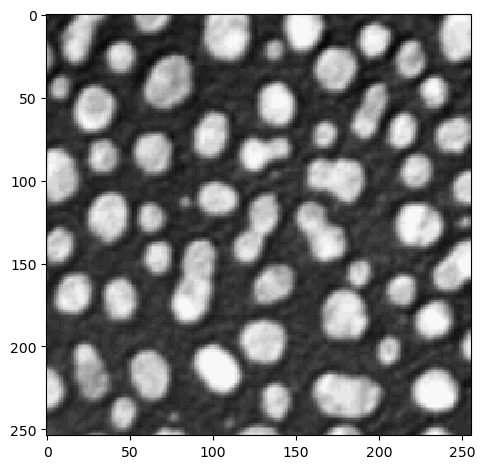

In [103]:
from skimage.io import imread, imshow
from skimage import data
image = imread('./data/blobs.tif')

imshow(image)

We now count the blobs in this image with two different algorithms we provide as parameter:

In [104]:
from skimage.filters import threshold_otsu

count_blobs(image, threshold_otsu)

64

In [105]:
from skimage.filters import threshold_yen

count_blobs(image, threshold_yen)

67

Exercise: Assume you want to find out which threshold algorithm works best for your image. Therefore, you may want to take a look at the image being thresholded by multiple algoritms. Define a list of threshold algorithms, e.g. from this list. Program a for-loop that applies the threshold algorithms to the blobs image and shows the results. The result should look similar to this example.

In [106]:
from skimage.filters import threshold_minimum, threshold_sauvola, threshold_niblack

In [107]:
algorithms = [threshold_minimum, threshold_sauvola, threshold_niblack]

In [122]:
for algo in algorithms:
    print(f"{algo.__name__} : {count_blobs(image, algo)}")

threshold_minimum : 64
threshold_sauvola : 121
threshold_niblack : 234


### Partial functions


In some use-cases it might be necessary to collect a function together with some parameters together in one variable to execute it later. functools’ partial() enables to do this.

In [1]:
from functools import partial

In [2]:
# example function:
def compute_sum(a, b):
    return a + b

In [3]:
# We can then store the partial object of that function in combination with the parameters in a variable.

sum_of_3_and_4 = partial(compute_sum, 3, 4)

In [4]:
# this object is callable 
sum_of_3_and_4()


7

Keeping parameters unset

It is also possible to only partially specify parameters.



In [5]:
sum_of_3_and_b = partial(compute_sum, 3)


In [6]:
sum_of_3_and_b(9)

12

Passing keyword arguments


In [7]:
sum_of_a_and_4 = partial(compute_sum, b=4)

In [8]:
sum_of_a_and_4(3)

7

In [10]:
sum_of_a_and_4(a=3)

7

Exercise: Program a function that determines the Euclidean distance of two points. Afterwards, use partial to pass one fixed point and a for-loop to print out distances of a list of points.

In [11]:
fixed_point = (1, 1, 1)
list_of_points = [(2,1,1), (1,1,3), (2,2,2)]

In [19]:
import euclidean

partial = partial(euclidean.euc_dist, fixed_point)

In [21]:

for point in list_of_points:
    print(partial(point))

2.0
2.23606797749979
2.449489742783178


### Workflows in napari

For using napari and dask together to define and design workflows, we made a small library to make these things more convenient: napari-workflows. Goal was to allow the user to setup a workflows by clicking in napari. These workflows are then accessible as object, similar to a dictionary, that can be asked for results of given workflow steps. For example, in the workflow shown below, an input image is blurred using a Gaussian kernel and then thresholded using Otsu’s method and scikit-image.

In [1]:
from napari_workflows import Workflow

from skimage.io import imread
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import label
from pyclesperanto_prototype import imshow

- define a workflow and add operations
- eg. operation takes an image named "input" and 
- produces a "denoised" image using gaussian() and sigma-2 as a paramater


In [2]:

workflow = Workflow()

# define denoising
workflow.set("denoised", gaussian, "input", sigma = 2)

- also add a custom function
- eg produce a binary image out of an intensity image directly from a single function all


In [3]:

# define segmentation

def threshold(image):
    return image > threshold_otsu(image)
workflow.set("binarized", threshold, "denoised")

In [7]:
workflow.set("labeled", label, "binarized")

print(str(workflow))

Workflow:
denoised <- (<function gaussian at 0x000001BAB597E670>, 'input', 2, None, 'nearest', 0, None, False, 4.0)
binarized <- (<function threshold at 0x000001BAB284A430>, 'denoised')
labelled <- (<function label at 0x000001BAB76DA160>, 'binarized', None, False)
input <- (array([ 40,  32,  24,  24,  16,  24,  24,  32,  32,  32,  24,  24,  24,
        24,  24,  32,  40,  80, 112, 152, 184, 208, 232, 232, 224, 216,
       208, 208, 208, 208, 200, 200, 200, 184, 160, 128,  88,  72,  48,
        40,  24,  24,  24,  32,  32,  40,  40,  48,  48,  48,  48,  72,
        96, 136, 176, 184, 192, 184, 168, 176, 184, 192, 200, 200, 192,
       184, 176, 184, 184, 192, 200, 192, 176, 144, 112,  88,  56,  40,
        24,  24,  24,  32,  32,  32,  32,  40,  40,  48,  48,  48,  48,
        48,  40,  40,  40,  56,  72, 120, 160, 192, 216, 232, 240, 232,
       224, 224, 224, 232, 232, 240, 240, 240, 240, 240, 232, 232, 224,
       216, 208, 184, 152, 104,  56,  48,  32,  40,  48,  64,  72,  64,
     

Executing workflows

- load an image and store in input

In [8]:
workflow.set("input", imread("https://samples.fiji.sc/blobs.png"))

print(str(workflow))

Workflow:
denoised <- (<function gaussian at 0x000001BAB597E670>, 'input', 2, None, 'nearest', 0, None, False, 4.0)
binarized <- (<function threshold at 0x000001BAB284A430>, 'denoised')
labelled <- (<function label at 0x000001BAB76DA160>, 'binarized', None, False)
input <- (array([ 40,  32,  24,  24,  16,  24,  24,  32,  32,  32,  24,  24,  24,
        24,  24,  32,  40,  80, 112, 152, 184, 208, 232, 232, 224, 216,
       208, 208, 208, 208, 200, 200, 200, 184, 160, 128,  88,  72,  48,
        40,  24,  24,  24,  32,  32,  40,  40,  48,  48,  48,  48,  72,
        96, 136, 176, 184, 192, 184, 168, 176, 184, 192, 200, 200, 192,
       184, 176, 184, 184, 192, 200, 192, 176, 144, 112,  88,  56,  40,
        24,  24,  24,  32,  32,  32,  32,  40,  40,  48,  48,  48,  48,
        48,  40,  40,  40,  56,  72, 120, 160, 192, 216, 232, 240, 232,
       224, 224, 224, 232, 232, 240, 240, 240, 240, 240, 232, 232, 224,
       216, 208, 184, 152, 104,  56,  48,  32,  40,  48,  64,  72,  64,
     

To actually execute computation, we call the workflow.get() function that produces a single specified output. Under the hood, it will also execute all intermediate operations that are necessary to come to the final output.

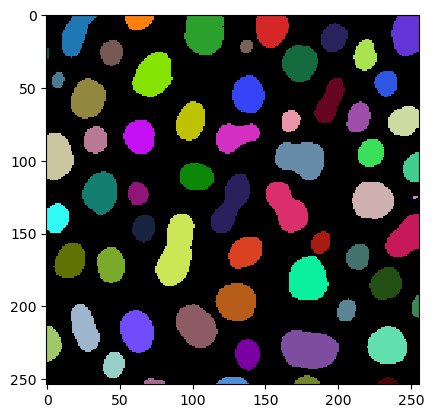

In [9]:
result = workflow.get("labeled")

imshow(result, labels=True)

#### Parallelization

When programming custom algorithms in python, it can happen that our code becomes slow because we run a couple of nested for-loops. If the inner loops do not depend on each other, code can be parallelized and sped up. Note, we are parallelizing code on a central processing unit (CPU) not not mix it up with GPU-acceleration that uses graphics processing units (GPUs).

In [10]:
import time
import numpy as np
from functools import partial
import timeit
import matplotlib.pyplot as plt
import platform

We start with an algorithm that does something with an image at given pixel coordinates

In [11]:
def slow_thing(image, x, y):
    # algorithm wasting time
    sum = 0
    for i in range(1000):
        for j in range(100):
            sum = sum + x
        sum = sum + y
    image[x,y] = sum

In [12]:
image = np.zeros((10, 10))

use timeit to measure how long operationtakes to process a single pixel

In [13]:
%timeit slow_thing(image, 4, 5)

2.64 ms ± 48.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Define operation on whole image:

In [14]:
def process_image(image):
    for x in range(image.shape[1]):
        for y in range(image.shape[1]):
            slow_thing(image, x, y)

In [15]:
%timeit process_image(image)

273 ms ± 2.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Parallelization using joblib.Parallel

A simple and straightforward approach for parallelization is using joblib.Parallel and joblib.delayed.

In [16]:
from joblib import Parallel, delayed, cpu_count

Note the reverse writing of the for loops in the following block. The term delayed(slow_thing)(image, x, y) is technially a function call, that is not executed. Later, when the return value of this call is actually needed, then the actualy execution will happen. See dask delayed for details.

In [ ]:
def process_image_parallel(image):